In [44]:
## Exploring algorithms for UFC project
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV , Lasso , LassoCV 

In [45]:
path = os.getcwd()
p = path.removesuffix('ufcPredictionProject')
p = p+'UFCDiffdata.csv'


df = pd.read_csv(p)
df = df.drop(['Unnamed: 0'],axis = 1)
print(df.shape)
df.head(3)

(7780, 89)


,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,Result
0,0.0,0.000000,0.200000,-0.010000,0.000000,-0.380000,1.000000,0.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,Loss
1,0.0,-0.960938,-0.238047,-0.092422,0.007031,0.134766,0.007812,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,Loss
2,-0.5,0.625000,0.071250,0.031250,0.162500,-0.343750,-0.875000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,Win


In [46]:
df['weight_class_WomenStrawweight'].value_counts()

0    7520
1     260
Name: weight_class_WomenStrawweight, dtype: int64

In [47]:
# removing rows that contain NaN
df.dropna(inplace=True)
print(df.shape)
df.head(3)
print(df.isnull().sum().sum())

(7780, 89)
0


In [48]:
# test train split
(df_train,df_test) = train_test_split(df, train_size = 0.8)

X_train = df_train.drop('Result',axis=1)
y_train = df_train.Result

X_test = df_test.drop('Result',axis=1)
y_test = df_test.Result

X = X_train
y = y_train

print(X.isnull().sum().sum())

0


In [49]:
X_train.head(3)

,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch
1612,-0.781738,0.50000,-0.070825,0.226367,0.356318,0.00000,0.321289,0.000000,0.003906,0.007812,...,0,0,0,1,0,0,0,0,1,0
7390,-1.000000,0.00000,0.090000,-0.007500,-0.357500,0.09500,0.500000,1.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
3356,0.000000,0.03125,0.038047,0.048594,-0.264375,0.32625,0.312500,1.195312,0.500000,0.312500,...,0,0,0,1,0,0,0,1,0,0


In [50]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [51]:
# one hot encode
X_cat = pd.get_dummies(X_cat)
print(X_cat['title_bout'].value_counts())
X_cat.head(3)


False    5807
True      417
Name: title_bout, dtype: int64


,title_bout
1612,False
7390,False
3356,False


In [52]:
# finding columns that are all zeros from X_num
cols = pd.Series(X_num.columns)
for i in range(len(cols)):
    if (X_num.iloc[:,i] == 0).all():
        print(cols[i])

In [53]:
# removing columns of zeros
#X_num = X_num.drop(['B_draw', 'R_draw'], axis=1)

In [54]:
# standardize
#X_num = (X_num - X_num.mean())/X_num.std()

In [55]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)

In [56]:
X.head()

,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
1612,-0.781738,0.50000,-0.070825,0.226367,0.356318,0.000000,0.321289,0.000000,0.003906,0.007812,...,0,0,1,0,0,0,0,1,0,False
7390,-1.000000,0.00000,0.090000,-0.007500,-0.357500,0.095000,0.500000,1.000000,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,False
3356,0.000000,0.03125,0.038047,0.048594,-0.264375,0.326250,0.312500,1.195312,0.500000,0.312500,...,0,0,1,0,0,0,1,0,0,False
5239,0.011719,0.00000,-0.077109,-0.001289,0.288242,-0.396953,0.027344,0.019531,-0.484375,0.039062,...,0,0,1,0,0,0,1,0,0,True
3603,0.000000,0.00000,-0.175000,0.040000,0.060000,-0.066250,0.000000,0.000000,0.250000,0.000000,...,0,0,1,0,0,0,0,1,0,False


In [57]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X,y)

C:\Users\cruseer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [58]:
# Training score
print('Training R2:',logr.score(X,y).round(2))

Training R2: 0.61


## Finding Test Error

In [59]:
X_train = X
y_train = y

In [60]:
X = X_test
y = y_test

In [61]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [62]:
# one hot encode
X_cat = pd.get_dummies(X_cat)

In [63]:
# standardize
#X_num = (X_num - X_num.mean())/X_num.std()

In [64]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)
X.head()

,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
3729,0.12500,0.00,0.110762,-0.207754,0.815391,-0.571523,-0.304688,0.003906,0.001953,0.000000,...,0,0,0,1,0,0,1,0,0,True
3637,-1.00000,-0.25,-0.187500,-0.115000,0.185000,0.000000,1.750000,-0.250000,0.000000,0.000000,...,0,0,1,0,0,0,1,0,0,False
4308,0.00000,-0.50,0.101250,-0.037500,-0.276250,-0.072500,-0.500000,-0.250000,0.125000,0.000000,...,0,0,1,0,0,0,1,0,0,False
1047,0.03125,0.00,0.043516,0.408281,0.095859,0.317812,1.292969,-0.351562,0.375000,-0.023438,...,0,0,0,1,0,0,1,0,0,False
364,0.50000,0.00,-0.100000,-0.115000,-0.100000,-0.500000,-1.500000,0.000000,-1.000000,-0.500000,...,0,0,0,0,1,0,1,0,0,False


In [65]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X_train,y_train)

C:\Users\cruseer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [66]:
# Test score
print('Test R2:',logr.score(X,y).round(2))

Test R2: 0.6


In [67]:
classOrder = logr.classes_
r = logr.coef_
print(classOrder)
print(r)

['Draw' 'Loss' 'Win']
[[ 1.46309192e-03 -8.51458868e-03 -2.69666136e-03  6.13045715e-03
   2.87265763e-03 -7.15378558e-04 -2.67953627e-02 -1.78711092e-02
  -2.91121091e-03 -3.17541555e-04 -1.68155057e-03  3.43140438e-03
   1.18396054e-02 -1.48880633e-02 -1.17106016e-02  1.17667841e-02
  -1.51533885e-02  1.82101227e-02 -2.12388882e-02  3.10770976e-02
  -3.00363461e-03 -4.30015147e-03  1.07701024e-02 -9.47716415e-03
   1.30636181e-03 -2.13767323e-03  1.17182793e-02 -2.24119603e-02
   2.06325512e-02 -2.65397276e-02 -2.41699316e-02  3.53205289e-02
  -1.00993069e-02  1.37893375e-02  2.07813220e-03  1.83440258e-05
  -2.95316597e-04  9.06463271e-04 -1.48853770e-02  1.66425623e-02
   8.76098614e-03 -7.35944717e-03  1.11256951e-02 -1.32295021e-02
   3.37393585e-03 -8.43507930e-03  2.74045554e-04  3.48949383e-04
   8.28138043e-05  3.37173321e-04 -2.50451578e-02  2.33832355e-02
   3.91299000e-02  1.85767098e-02 -1.08280555e-02  4.23375562e-02
   4.26234889e-03  4.48331064e-02 -1.64913218e-02  6.6

## Feature Selection

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
X_test = X
y_test = y

In [70]:
# LASSO to find insignificant features to drop
grid = {'C':[0.01, 0.1, 1, 10, 100]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000)
gs_model = GridSearchCV(estimator=lr_model, param_grid=grid, n_jobs=-1)
gs_model.fit(X_train, y_train)
# TAKES ROUGHLY 6 MINUTES TO RUN!!!

GridSearchCV(estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [71]:
gs_model.best_params_

{'C': 0.1}

In [72]:
# Train a LR model with best parameters
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [73]:
model.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.52144826e-04, -9.02309680e-03,
         8.24145570e-03,  1.75833648e-04,  1.09735709e-03,
        -5.74588988e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.61946935e-03,  0.00000000e+00,
        -1.96107337e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.79419601e-04,  0.00000000e+00,
         0.00000000e+00,  1.03515617e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.14059980e-03,
         0.00000000e+00,  9.70440975e-04,  0.00000000e+00,
         1.83558886e-04,  0.00000000e+00,  0.00000000e+00,
        -2.70455237e-03,  1.89464537e-04,  2.17448528e-04,
         1.26702326e-04,  0.00000000e+00,  0.00000000e+0

In [78]:
# viewing coefficients after LASSO
coef = model.coef_[2]
coef

array([ 8.01650493e-02, -1.78793972e-02,  2.72476287e-01, -1.84987771e-01,
        0.00000000e+00, -1.90541639e-01,  3.14132528e-02,  0.00000000e+00,
       -1.43926529e-01,  1.11821609e-02,  3.31458323e-02, -3.21434641e-02,
       -2.39933508e-03,  0.00000000e+00, -4.25449746e-02,  4.23178095e-02,
        6.61757260e-03, -7.12299108e-03,  6.11022725e-02,  2.24885957e-04,
        4.67672147e-02,  8.16204338e-02,  7.57982018e-03,  6.31980108e-08,
       -3.40433379e-03,  0.00000000e+00,  0.00000000e+00, -3.12432341e-04,
        7.37222171e-03, -1.26107475e-02,  2.73338038e-02, -2.77795520e-02,
       -3.88333375e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.48186132e-03,  0.00000000e+00,  2.91469045e-03, -7.87942584e-03,
       -2.27694985e-02,  2.26398730e-02,  2.01355987e-02, -2.63219481e-02,
        5.88834019e-03, -6.60209025e-03, -3.77109497e-04, -1.90722242e-03,
        8.02190949e-04,  4.11771142e-03,  1.92427519e-02,  2.64596819e-03,
        3.51078393e-03,  

In [79]:
# storing coefficients and feature name in data frame
coef_df = pd.DataFrame()
coef_df['features'] = X_train.columns
coef_df['coefficient'] = coef
print(coef_df.shape)
print(coef_df.iloc[0,1])
coef_df.head()

(88, 2)
0.08016504928633146


,features,coefficient
0,DIFF_avg_KD,0.080165
1,DIFF_avg_opp_KD,-0.017879
2,DIFF_avg_SIG_STR_pct,0.272476
3,DIFF_avg_opp_SIG_STR_pct,-0.184988
4,DIFF_avg_TD_pct,0.000000


In [80]:
# remove features with zero coefficients
coef_df = coef_df[coef_df['coefficient'] != 0]
coef_df = coef_df.sort_values(by=['coefficient'],ascending=False)

print(coef_df.shape)
coef_df.head()

(59, 2)


,features,coefficient
2,DIFF_avg_SIG_STR_pct,0.272476
84,Opponent_Stance_Orthodox,0.092314
21,DIFF_avg_opp_TD_landed,0.081620
0,DIFF_avg_KD,0.080165
18,DIFF_avg_TD_att,0.061102


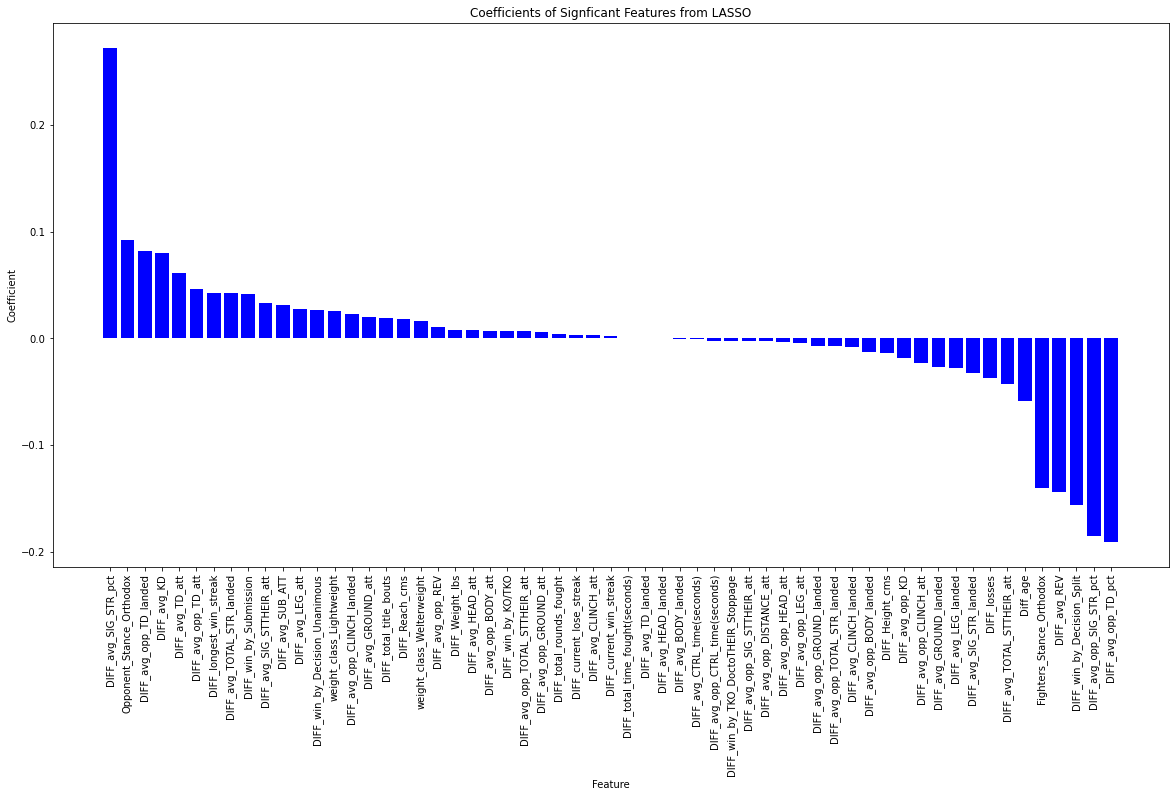

In [81]:
# plot coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar('features', 'coefficient', data = coef_df, color = "blue")
plt.xlabel("Feature")
plt.xticks(rotation = 90)
plt.ylabel("Coefficient")
plt.title("Coefficients of Signficant Features from LASSO")
plt.show()

In [82]:
# removing insifnificant features from X
X_train_imp = X_train[coef_df.features]
X_test_imp = X_test[coef_df.features]
X_train_imp.head(3)

,DIFF_avg_SIG_STR_pct,Opponent_Stance_Orthodox,DIFF_avg_opp_TD_landed,DIFF_avg_KD,DIFF_avg_TD_att,DIFF_avg_opp_TD_att,DIFF_longest_win_streak,DIFF_avg_TOTAL_STR_landed,DIFF_win_by_Submission,DIFF_avg_SIG_STTHEIR_att,...,DIFF_avg_LEG_landed,DIFF_avg_SIG_STR_landed,DIFF_losses,DIFF_avg_TOTAL_STTHEIR_att,Diff_age,Fighters_Stance_Orthodox,DIFF_avg_REV,DIFF_win_by_Decision_Split,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_opp_TD_pct
1612,-0.070825,0,0.00000,-0.781738,1.473145,0.050781,0,-3.525879,3,1.246094,...,-2.83252,-1.803711,-1,-1.361328,4,1,0.003906,0,0.226367,0.00000
7390,0.090000,1,2.00000,-1.000000,2.000000,4.500000,0,0.500000,0,-0.750000,...,-1.75000,4.500000,0,-7.750000,2,0,0.000000,0,-0.007500,0.09500
3356,0.038047,1,2.53125,0.000000,-11.656250,7.054688,2,-3.148438,1,-46.882812,...,3.28125,-9.289062,4,-40.476562,3,1,0.500000,0,0.048594,0.32625


In [85]:
# Rerunning Logistic Regression with reduced feature set
logr = LogisticRegression(random_state=0, max_iter=10000)
logr.fit(X_train_imp,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [86]:
# Scores
print('Train R2:',logr.score(X_train_imp,y_train).round(2))
print('Test R2:',logr.score(X_test_imp,y_test).round(2))

Train R2: 0.61
Test R2: 0.6


## Ridge Regression

In [34]:
grid = {'alpha':[0.01,0.1,1,10,100]}
ridge = Ridge()
ridgeCV = GridSearchCV(ridge,param_grid = grid , return_train_score = True)
ridgeCV.fit(X_train,y_train)

C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **

C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **

C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **

C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\kovacsja\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **

ValueError: could not convert string to float: 'Loss'

In [36]:
X_train.head(10)

,Unnamed: 0,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
4961,0.479727,1.757542,-0.015263,0.041997,-0.575464,-0.987931,0.021374,-0.658896,0.010799,-0.604308,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,0.570378,-0.517276,-0.184070,False
6886,1.337749,-1.231348,-0.011827,0.491127,0.634517,0.451903,0.198590,-0.389254,-0.038129,0.573036,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,-1.752942,1.932895,-0.184070,False
3474,-0.183068,0.372673,0.473810,0.370630,0.021917,1.146037,0.044702,-0.084348,0.549468,-0.001946,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,0.570378,-0.517276,-0.184070,True
2073,-0.807530,0.494892,-0.002664,-0.433807,1.248630,0.603490,1.292702,-0.367160,1.097892,-0.294000,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,0.570378,-0.517276,-0.184070,False
1449,-1.085663,-0.244925,-1.175522,2.690887,2.679686,1.260889,-0.549507,0.410573,0.001044,-0.878109,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,0.570378,-0.517276,-0.184070,False
5875,0.887120,0.001681,-0.002664,1.165142,-1.191203,2.865872,-1.525360,-0.013645,0.001044,-0.001946,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,-1.752942,-0.517276,5.431856,False
6338,1.093491,0.001681,-2.348381,-0.252721,0.748151,-2.464967,-1.525360,-0.013645,-2.506038,-0.001946,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,-1.752942,-0.517276,5.431856,False
6036,0.958882,-1.477954,-0.002664,-0.366382,0.916281,0.867703,1.855546,0.940846,-0.155649,-0.001946,...,-0.18731,-0.043948,-1.774494,-0.513281,5.634962,-0.040112,-1.752942,-0.517276,5.431856,False
5849,0.875531,1.804936,0.076366,-0.796996,0.194404,1.232427,0.250889,0.018181,0.234887,0.326615,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,0.570378,-0.517276,-0.184070,True
3377,-0.226304,0.001681,-1.615344,0.232743,-1.343693,-0.297522,-1.803900,-0.437863,-0.312341,-0.001946,...,-0.18731,-0.043948,0.563451,-0.513281,-0.177435,-0.040112,-1.752942,1.932895,-0.184070,False
